# Principal Component Analysis

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

## Dataset
Consider the dataset of $p$ samples with $d$ features $\{ \mathbf{x}_i\}_{i=1}^p \subset \mathbb{R}^d$.

We collect the dataset into the data matrix
$$ \mathbf{X} \in \R^{p \times d}$$

Important note: **the data must be mean-centered** $\frac{1}{p}\sum_{i} \mathbf{x}_i = \mathbf{0}$



## Optimization

Goal: extract $k < p$ features that provide an accurate low dimensional reconstruction of our samples.


So we formulate the optimization problems. First we want to find the directions of maximum variance
$$
    \mathbf{V} = \argmax_{\substack{\mathbf{W}^\top \mathbf{W} = \mathbf{I}}} \sum_{i} (\mathbf{W} \mathbf{x})^\top \mathbf{W} \mathbf{x} = \argmax_{\substack{\mathbf{W}^\top \mathbf{W} = \mathbf{I}}} \mathrm{tr}(\mathbf{W}^\top \mathbf{X}^\top \mathbf{X} \mathbf{W})
$$
This is equivalent to finding the rank $k$ projection, $\boldsymbol{\Pi}_\mathbf{W}(\mathbf{x}) := \mathbf{W} \mathbf{W}^\top \mathbf{x}$ of our data that is closest to the data. 
$$
    \mathbf{V} = \argmin_{\substack{\mathbf{W}^\top \mathbf{W} = \mathbf{I}}} \mathbb{E} \left[ \| \mathbf{x}_i - \boldsymbol{\Pi}_\mathbf{W}(\mathbf{x}_i)  \|_2^2\right]
$$

**This is just an eigenvalue problem**

## Transformation

We call $\mathbf{V}$ the matrix of PCA weights (columns of $\mathbf{V}$) or empirical orthogonal functions (EOFs)

The first k principal components (PCs) of $\mathbf{X}$ is $\hat{\mathbf{X}} = \mathbf{X} \mathbf{V}$.

The PCA map is $\hat{\mathbf{x}} = \mathbf{V}^\top \mathbf{x}$


In [3]:
# load data

p = 20
d = 4

dataset = load_iris()
X = dataset['data']
y = dataset['target']

Text(0, 0.5, 'PC2')

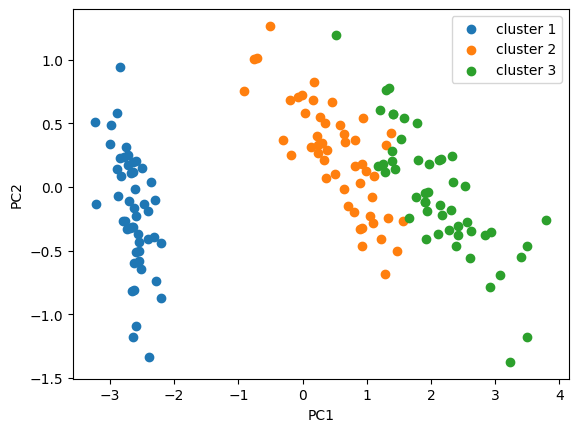

In [ ]:
# pca with numpy

k = 2 #do 2 PCs

# mean center data
mu = np.mean(X, axis = 0)
X = X - mu

U, S, Vt = np.linalg.svd(X) #svd
V = Vt.T

Xhat = X @ V[:,:k] #pca
for id in [0,1,2]:
    idx = np.where(y == id)[0]
    plt.scatter(Xhat[idx,0],Xhat[idx,1], label = f'cluster {id+1}')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

Xrec = Xhat @ V[:,:k].T + mu #reconstruct

Text(0, 0.5, 'PC2')

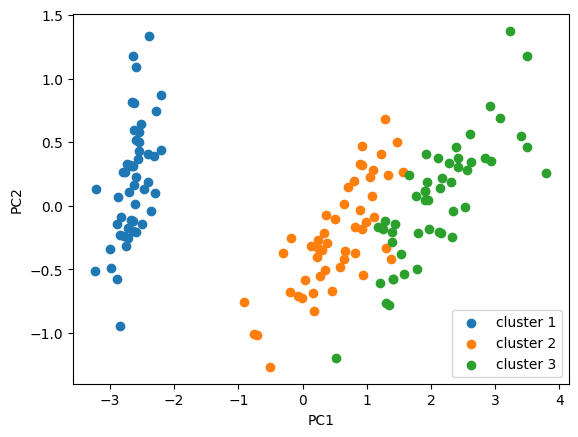

In [ ]:
# pca with sklean
from sklearn.decomposition import PCA

my_pca = PCA(n_components=k)
Xhat = my_pca.fit_transform(X)

for id in [0,1,2]:
    idx = np.where(y == id)[0]
    plt.scatter(Xhat[idx,0],Xhat[idx,1], label = f'cluster {id+1}')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

Xrec = my_pca.inverse_transform(Xhat) #reconstruct

#### Other PCA features

**Explained variance** is how much variance each component explains in you data

* Explained variance of component $i$ is the eigenvalue $\lambda_i = \mathbf{v}_i^\top \mathbf{X}^\top \mathbf{X} \mathbf{v}_i$

* Explained variance ratio of component $i$ is the normalized eigenvalue $\frac{\lambda_i}{\sum_{i} \lambda_i}$

Text(0.5, 1.0, 'Explained Variance Ratio')

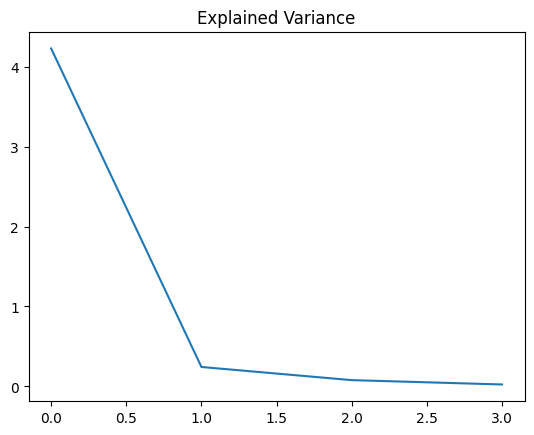

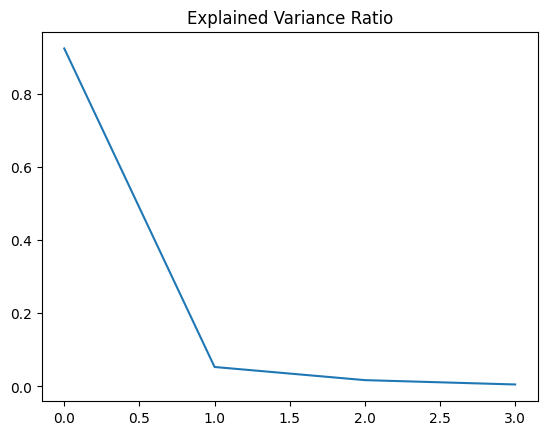

In [85]:
my_pca = PCA(n_components=4) # to all pcs
my_pca.fit(X)

plt.figure()
plt.plot(my_pca.explained_variance_)
plt.title('Explained Variance')

plt.figure()
plt.plot(my_pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')